# Data Science Project
## Topic: Air Pollution

## Import package

In [74]:
#Импортируем нужные библиотеки для нашей работы

import numpy as np #Библиотека для работы с числами и массивами чисел
import pandas as pd #Библиотека для создания датасетов и работы с ними
import matplotlib.pyplot as plt #Функция создания графиков для отображения наших данных
from sklearn.model_selection import train_test_split #Функция разделения данных на тренировочные и тестовые данные
from sklearn.preprocessing  import LabelEncoder as le #Энкодер для кодирования категоричных данных 
from sklearn.preprocessing import PolynomialFeatures 
#Полиномиальные функции — это те функции, которые создаются путем возведения существующих функций в степень.

In [75]:

from sklearn import linear_model#Наша модель, линейная регрессия 
from sklearn.metrics import mean_squared_error, r2_score #функции оценки модели


In [76]:
pd.set_option('display.max_columns', None) #для отображения всех колонок датафрейма
pd.options.mode.use_inf_as_na = True

## Data loading

In [77]:
df = pd.read_csv('AirPollutionDataset5CitiesKZ.csv') #Наш датасет

Датасет был взят из сайта OpenWeather, с использованием их API фукнций.
Период данных - с 2020 по апрель 2023

## First look at data

In [78]:
df.head()

,Date,Air Quality Index,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,City
0,1606586400,2,367.17,0.33,62.38,29.33,122.07,7.12,7.71,0.23,Almaty
1,1606590000,2,390.53,0.40,61.69,27.18,135.42,7.37,8.09,0.24,Almaty
2,1606593600,2,383.85,0.26,54.15,32.54,127.79,6.68,7.43,0.23,Almaty
3,1606597200,2,373.84,0.16,48.67,38.62,123.98,6.03,6.74,0.23,Almaty
4,1606600800,2,413.90,0.75,61.69,22.71,137.33,9.05,9.84,0.38,Almaty


1. Date - дата и время сбора информации, в секундах. Интервал замеров - 1 час. 
2. Air Quality Index - Уровень загрязнения воздуха. От 1 до 5. Чем выше, тем хуже.
3. СО - Концентрация СО (Оксид углерода), мкг/м3
4. NO - Концентрация NO (азота монооксида), мкг/м3
5. NO2 - Концентрация NO2 (двуокиси азота), мкг/м3
6. O3 - Концентрация O3 (озона), мкг/м3
7. SO2 - Концентрация SO2 (сернистого газа), мкг/м3
8. PM2_5 - Концентрация PM2.5 (мелкодисперсное вещество), мкг/м3
9. PM10 - Концентрация PM10 (грубых взвешенных частиц), мкг/м3
10. NH3 - Концентрация NH3 (аммиака), мкг/м3
11. City - город, откуда была взята информация

In [79]:
df.describe()

,Date,Air Quality Index,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3
count,1.010450e+05,101045.000000,101045.000000,101045.000000,101045.000000,101045.000000,101045.000000,101045.000000,101045.000000,101045.000000
mean,1.643217e+09,1.990905,323.409463,8.954221,20.236030,51.048053,54.252891,12.800067,17.261290,0.631094
std,2.121260e+07,1.121409,209.373416,28.681283,26.784225,31.091971,106.361054,16.519774,29.564872,0.969341
min,1.606586e+09,1.000000,136.850000,0.000000,0.270000,0.000000,0.660000,0.500000,0.520000,0.000000
25%,1.624860e+09,1.000000,220.300000,0.010000,3.510000,27.540000,6.620000,3.250000,3.900000,0.100000
50%,1.643134e+09,2.000000,270.370000,0.210000,8.140000,52.210000,14.070000,7.290000,9.350000,0.310000
75%,1.661580e+09,2.000000,337.120000,2.370000,24.680000,73.670000,42.920000,15.800000,21.430000,0.800000
max,1.680286e+09,5.000000,4005.430000,500.680000,224.830000,334.740000,1480.100000,253.770000,1255.580000,27.870000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101045 entries, 0 to 101044
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               101045 non-null  int64  
 1   Air Quality Index  101045 non-null  int64  
 2   CO                 101045 non-null  float64
 3   NO                 101045 non-null  float64
 4   NO2                101045 non-null  float64
 5   O3                 101045 non-null  float64
 6   SO2                101045 non-null  float64
 7   PM2_5              101045 non-null  float64
 8   PM10               101045 non-null  float64
 9   NH3                101045 non-null  float64
 10  City               101045 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 8.5+ MB


In [81]:
df.isnull().sum() 

Date                 0
Air Quality Index    0
CO                   0
NO                   0
NO2                  0
O3                   0
SO2                  0
PM2_5                0
PM10                 0
NH3                  0
City                 0
dtype: int64

В наших данных нет пустых строк, неправильных данных, аутлаеров и нулей.

In [82]:
df.City.unique()

array(['Almaty', 'Semey', 'Shymkent', 'Temirtau', 'Uralsk'], dtype=object)

В нашем датасете 5 городов: Алматы, Семей, Шымкент, Темиртау, Уральск.

## Data cleaning

In [83]:
df.dropna(inplace=True)

In [84]:
df.select_dtypes(include=['object']).columns.tolist()

['City']

In [85]:
#Encoding all categorical data in Label Encoder
dle = le().fit(df.Date)
cle = le().fit(df.City)


In [86]:
df.Date = dle.transform(df.Date)
df.City = cle.transform(df.City)

In [87]:
df.head()

,Date,Air Quality Index,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,City
0,0,2,367.17,0.33,62.38,29.33,122.07,7.12,7.71,0.23,0
1,1,2,390.53,0.40,61.69,27.18,135.42,7.37,8.09,0.24,0
2,2,2,383.85,0.26,54.15,32.54,127.79,6.68,7.43,0.23,0
3,3,2,373.84,0.16,48.67,38.62,123.98,6.03,6.74,0.23,0
4,4,2,413.90,0.75,61.69,22.71,137.33,9.05,9.84,0.38,0


In [88]:
df.tail()

,Date,Air Quality Index,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,City
101040,20204,2,250.34,0.39,3.77,70.81,6.74,2.71,2.93,0.36,4
101041,20205,2,250.34,0.07,4.28,68.66,6.91,2.68,2.93,0.39,4
101042,20206,2,250.34,0.00,4.46,64.37,7.03,2.79,3.05,0.44,4
101043,20207,2,250.34,0.00,4.28,62.94,6.62,3.06,3.33,0.47,4
101044,20208,2,247.00,0.00,3.86,64.37,5.60,2.99,3.25,0.46,4


## Data Analysis

In [89]:
%matplotlib inline

<AxesSubplot: >

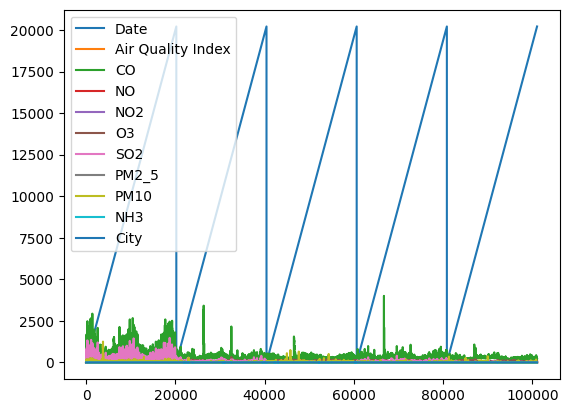

In [90]:
df.plot()

Text(0.5, 1.0, 'Correlation Matrix')

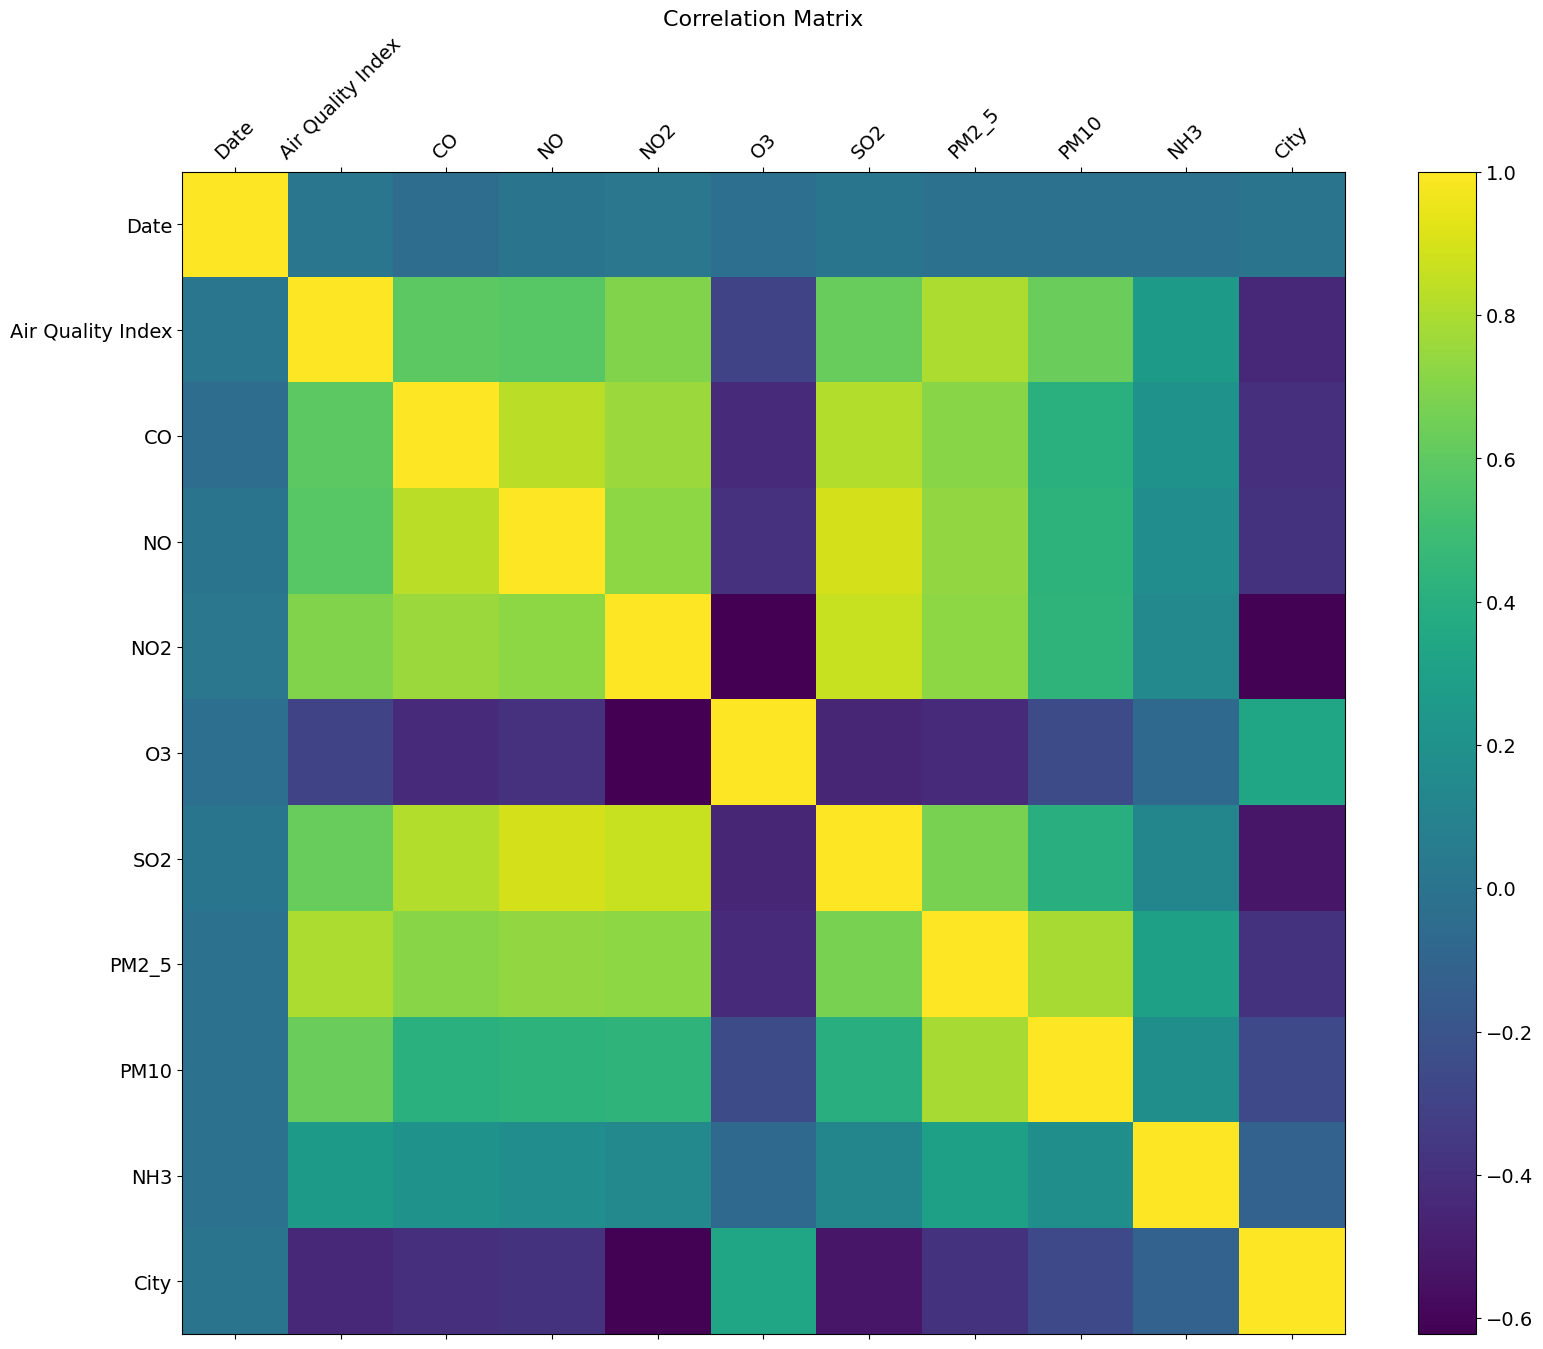

In [91]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

(array([9.2288e+04, 6.3160e+03, 1.5630e+03, 5.4800e+02, 1.7400e+02,
        8.0000e+01, 3.7000e+01, 2.9000e+01, 5.0000e+00, 5.0000e+00]),
 array([ 136.85 ,  523.708,  910.566, 1297.424, 1684.282, 2071.14 ,
        2457.998, 2844.856, 3231.714, 3618.572, 4005.43 ]),
 <BarContainer object of 10 artists>)

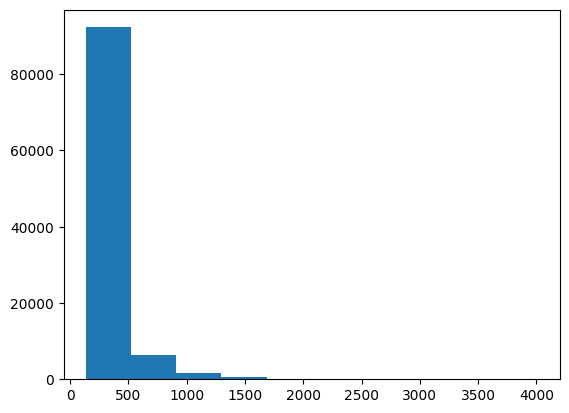

In [92]:
plt.hist(df.CO)

(array([8.8008e+04, 9.7580e+03, 2.1420e+03, 6.4400e+02, 2.6200e+02,
        1.2100e+02, 4.8000e+01, 3.2000e+01, 2.0000e+01, 1.0000e+01]),
 array([  0.5  ,  25.827,  51.154,  76.481, 101.808, 127.135, 152.462,
        177.789, 203.116, 228.443, 253.77 ]),
 <BarContainer object of 10 artists>)

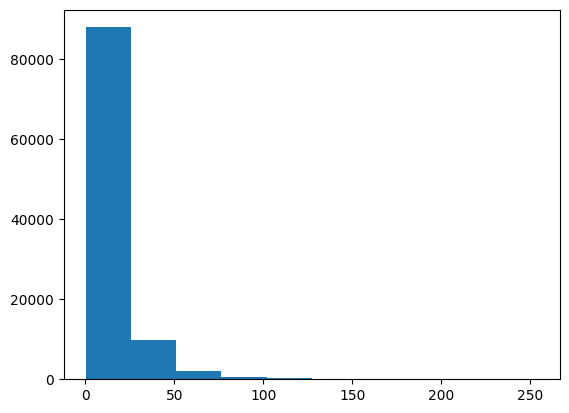

In [93]:
plt.hist(df.PM2_5)

(array([9.5467e+04, 3.4070e+03, 1.2060e+03, 5.0200e+02, 2.4500e+02,
        1.2000e+02, 5.7000e+01, 3.4000e+01, 4.0000e+00, 3.0000e+00]),
 array([  0.   ,  50.068, 100.136, 150.204, 200.272, 250.34 , 300.408,
        350.476, 400.544, 450.612, 500.68 ]),
 <BarContainer object of 10 artists>)

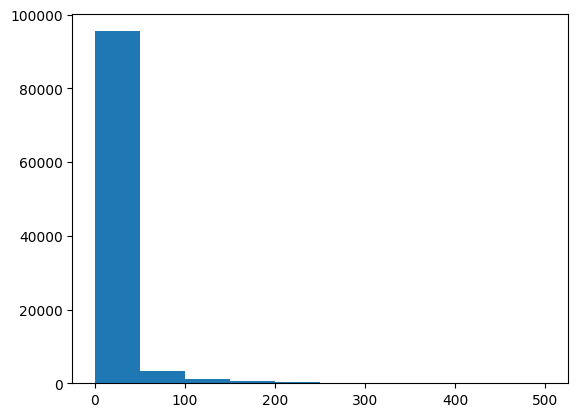

In [94]:
plt.hist(df.NO)

## Data division in train test sets

In [95]:
#Разделяем наш датасет на тренировочную дату и тестовую
x = df.copy()
y = df.CO
del x['CO']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.175, random_state=69)

In [96]:
x_train.shape, x_test.shape ,y_train.shape ,y_test.shape

((83362, 10), (17683, 10), (83362,), (17683,))

## Model Training

In [97]:
# Создаем модель линейной регрессии
model = linear_model.LinearRegression()
# Обучаем ее
model.fit(x_train, y_train)
# Предсказываем наши значения
y_predicted = model.predict(x_test)
#Оценка модели
print("R-square LinearRegression():",r2_score(y_test, y_predicted))
print("Mean Squared Error of LinearRegression():",mean_squared_error(y_test, y_predicted))
print("Accuracy of the model:", model.score(x_train, y_train))

R-square LinearRegression(): 0.7897344954081327
Mean Squared Error of LinearRegression(): 9014.744820391023
Accuracy of the model: 0.7479040931892595


In [98]:
#Показываем значения, которые предсказала наша модель
show = 40
x_pred = x_test.copy()
x_test2 = x_test.copy()
x_pred['CO'] = y_predicted
x_test2['CO'] = y_test
x_test2.iloc[0:1]
print( "Predicted CO Level:", x_pred.iloc[show:show+1].CO.sum(),"\nActual CO Level:",x_test2.iloc[show:show+1].CO.sum())

Predicted CO Level: 236.0577954184072 
Actual CO Level: 250.34


In [99]:
x_pred.head()

,Date,Air Quality Index,NO,NO2,O3,SO2,PM2_5,PM10,NH3,City,CO
87170,6334,2,0.00,2.87,94.41,6.02,12.97,15.02,0.57,4,275.435691
31065,10856,3,3.05,34.96,6.71,69.62,24.35,25.69,2.01,1,360.837794
73171,12544,2,0.27,1.11,105.86,4.89,1.59,1.84,0.22,3,229.242776
84546,3710,2,0.59,2.31,92.98,8.35,4.71,4.84,0.03,4,260.642512
44398,3980,2,0.04,0.95,95.84,1.73,1.94,4.58,0.12,2,232.712678


In [100]:
x_test2.head()

,Date,Air Quality Index,NO,NO2,O3,SO2,PM2_5,PM10,NH3,City,CO
87170,6334,2,0.00,2.87,94.41,6.02,12.97,15.02,0.57,4,420.57
31065,10856,3,3.05,34.96,6.71,69.62,24.35,25.69,2.01,1,427.25
73171,12544,2,0.27,1.11,105.86,4.89,1.59,1.84,0.22,3,233.65
84546,3710,2,0.59,2.31,92.98,8.35,4.71,4.84,0.03,4,210.29
44398,3980,2,0.04,0.95,95.84,1.73,1.94,4.58,0.12,2,186.92


## Model improvement

In [101]:
# Выполнение проектирования признаков путем добавления полиномиальных признаков
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

# Создаем новую модель линейной регрессии с полиномиальными функциями
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Прогнозирование тестовых данных с помощью полиномиальной модели
y_pred_poly = lr_poly.predict(X_test_poly)

# Вычислить MSE с полиномиальными функциями
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Accuracy of the model:", lr_poly.score(X_train_poly, y_train))

Accuracy of the model: 0.7623933118753827


In [102]:
#Показываем значения, которые предсказала наша модель
show = 200
x_pred_poly = x_test.copy()
x_pred_poly['CO'] = y_pred_poly
print( "Predicted CO Level:", x_pred_poly.iloc[show:show+1].CO.sum(),"\nActual CO Level:",x_test2.iloc[show:show+1].CO.sum())

Predicted CO Level: 400.74474588302655 
Actual CO Level: 403.88


Показываем на графике наши предсказанные значения уровней СО с настоящими значениями

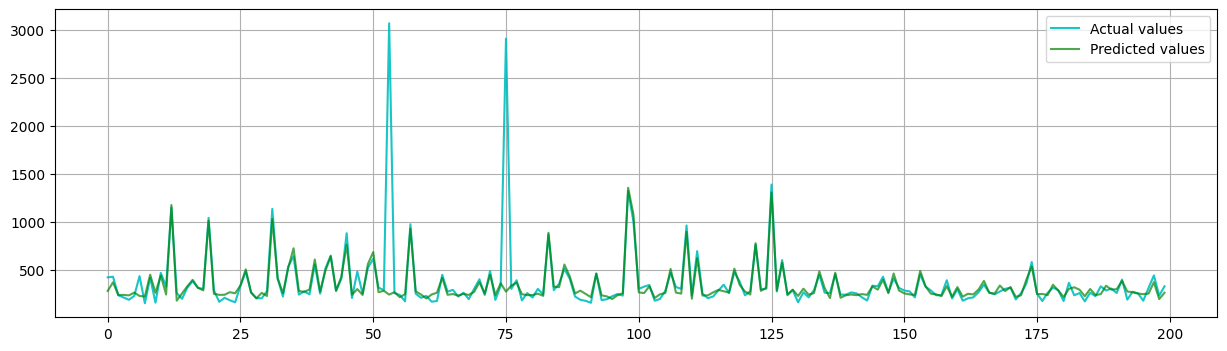

In [103]:
plt.figure(figsize=(15,4))
plt.plot( range(len(x_test2.iloc[0:200].CO)), x_test2.iloc[0:200].CO, color='c' ,alpha=0.9,label="Actual values")
plt.plot( range(len(x_pred_poly.iloc[0:200].CO)), x_pred_poly.iloc[0:200].CO, color='g',alpha=0.69,label="Predicted values")
plt.grid()
plt.legend()

# Conclusion

In conclusion, the data science project has been a comprehensive and enlightening experience in exploring the fundamental steps of data analysis. Importing the data was the initial step, followed by thorough cleaning and interpolation techniques to address missing or inconsistent data. These data preparation tasks were crucial to ensure the quality and integrity of the dataset for further analysis.

The application of linear regression as a predictive modeling technique on the cleaned and interpolated dataset allowed us to gain insights into the relationships between variables and make accurate predictions. The linear regression model served as a valuable tool for understanding the underlying patterns and trends in the data, and it provided valuable information for decision-making and problem-solving purposes.

Throughout the laboratory work, we were able to apply various data science techniques and tools, such as data importation, data cleaning, and data interpolation, in a systematic and structured manner. The practical implementation of these techniques has provided a hands-on experience in working with real-world data, which is a critical skill in the field of data science.